In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarshgoyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
biden_df = pd.read_csv(r'https://raw.githubusercontent.com/deepak0437/natural_language_processing/main/Predict_US_Elections/Bidenall2.csv')
trump_df = pd.read_csv(r'https://raw.githubusercontent.com/deepak0437/natural_language_processing/main/Predict_US_Elections/Trumpall2.csv')

df_twits = pd.concat([biden_df, trump_df], ignore_index=True).drop(columns=['user'])
df_twits.tail(10)

,text
5318,@realDonaldTrump No don’t delay it. And you ca...
5319,@realDonaldTrump https://t.co/sQDPbuNMKB
5320,@realDonaldTrump You do realize that you still...
5321,@realDonaldTrump 2nd only to yours.
5322,@realDonaldTrump Absolutely!
5323,"@realDonaldTrump For the 1/100 time, absentee ..."
5324,@realDonaldTrump If you’re so scared of losing...
5325,@realDonaldTrump I rarely get involved with fo...
5326,@realDonaldTrump This is the moment when Trump...
5327,"@realDonaldTrump I’m sorry, Donald. No. #POTUS"


In [4]:
##to check the sentiment polarity of trump dataset
textblob1 = TextBlob(trump_df['text'][10])
print("Trump:", textblob1.sentiment)

##to check the sentiment polarity of biden dataset
textblob2 = TextBlob(biden_df['text'][500])
print("Biden:", textblob2.sentiment)

Trump: Sentiment(polarity=0.15, subjectivity=0.3125)
Biden: Sentiment(polarity=0.6, subjectivity=0.9)


In [5]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [6]:
df_twits["polarity"] = df_twits['text'].apply(find_polarity)

df_twits["label"] = np.where(df_twits["polarity"] > 0, "positive", "negative")
df_twits["label"] = np.where(df_twits["polarity"] == 0, "neutral", df_twits["label"])
df_twits.sample(20)

,text,polarity,label
1456,@JoeBiden I’m joe Biden and I’m gonna beat joe...,0.000,neutral
1754,@JoeBiden https://t.co/smC4yxIG8e,0.000,neutral
3590,@realDonaldTrump We will overcome it!,0.000,neutral
3151,@FoxNews Weird that you found time to watch T...,-0.200,negative
4027,@realDonaldTrump Article 25....,0.000,neutral
1732,@JoeBiden Again why do you talk about it being...,0.000,neutral
3838,@realDonaldTrump @FoxNews @DHSgov Kisses to my...,0.000,neutral
2637,lies,0.000,neutral
2805,Such a racist,0.000,neutral
3025,?????????????????????????????????????????????...,0.000,neutral


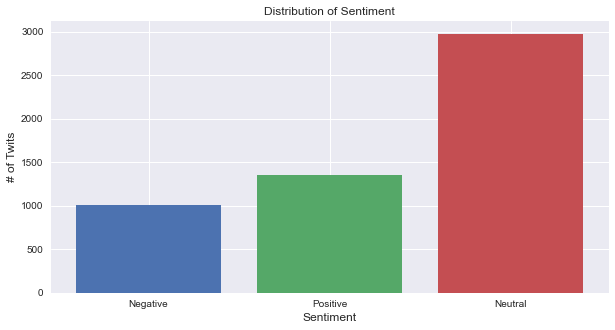

In [7]:
plt.figure(figsize=(10, 5))
plt.bar('Negative', len(df_twits[df_twits['label']=='negative']))
plt.bar('Positive', len(df_twits[df_twits['label']=='positive']))
plt.bar('Neutral', len(df_twits[df_twits['label']=='neutral']))


plt.title('Distribution of Sentiment', size=12)
plt.xlabel('Sentiment', size=12)
plt.ylabel('# of Twits', size=12);

In [8]:
df = df_twits[df_twits['label']!='neutral']
df.shape

(2355, 3)

In [9]:
import re
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 

def normalize(i):
#     for i in data:
    i = re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",i)
    
    i = i.lower()
    # get rid of urls
    i = re.sub('https?://\S+|www\.\S+', '', i)

    i = re.sub('<[^>]*>', '', i)
    i = re.sub(r'[^\w\s]','', i)
    i = re.sub(r'\$\w*','', i)
    i = re.sub(r'^RT[\s]+','', i)
    i = re.sub(r'http\S+','', i)
    i = re.sub(r'#','', i)

    # get rid of non words and extra spaces
    i = re.sub('\\W', ' ', i)
    i = re.sub('\n', '', i)
    i = re.sub(' +', ' ', i)
    i = re.sub('^ ', '', i)
    i = re.sub(' $', '', i)
    
    return i

In [10]:
df.text = df.text.apply(remove_stopwords)
df.text = df.text.apply(normalize)

df.tail()

/var/folders/sc/m38hzk_90cn6t0363cr74ny40000gn/T/ipykernel_65330/946631964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(remove_stopwords)
/var/folders/sc/m38hzk_90cn6t0363cr74ny40000gn/T/ipykernel_65330/946631964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(normalize)


,text,polarity,label
5311,yeah definitely afraid donny boy,-0.6000,negative
5313,oh little baby scared voted office soon trump ...,-0.1875,negative
5322,absolutely,0.2500,positive
5325,rarely get involved foreign politics not place...,0.2250,positive
5327,im sorry donald no,-0.5000,negative


# Logistic Regression

In [11]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [13]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)
X = tfidf.fit_transform(df['text'])
y = df['label'].map({'negative':0, 'positive':1}).values

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression(C=5, solver='liblinear').fit(X_train, y_train)

In [69]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = clf.predict(X_test)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.7961783439490446
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       201
           1       0.81      0.84      0.83       270

    accuracy                           0.80       471
   macro avg       0.79      0.79      0.79       471
weighted avg       0.80      0.80      0.80       471



In [70]:
binary_predictions = []

for i in y_pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

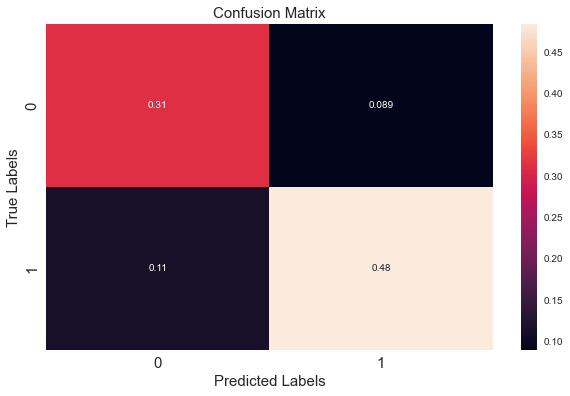

In [71]:
import seaborn as sns
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

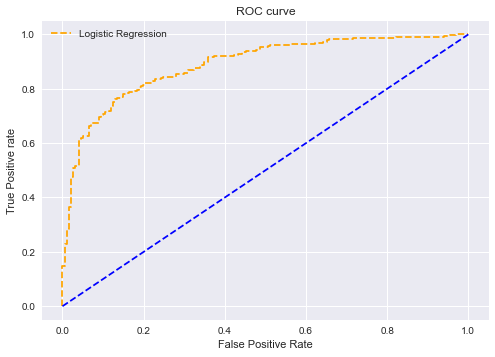

AUC score: 0.8884


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob1 = clf.predict_proba(X_test)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print('AUC score:',round(auc_score1, 4))